In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape #dataset contains 1599 rows and 12 column

(1599, 12)

In [4]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
#checking number of unique values in each column
data.nunique().to_frame("No of unique values")

,No of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [17]:
#checking the value counts of each column
for i in data.columns:
    print(data[i].value_counts())

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64
free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75


In [18]:
"'we can say no any missing values and null values also'"

"'we can say no any missing values and null values also'"

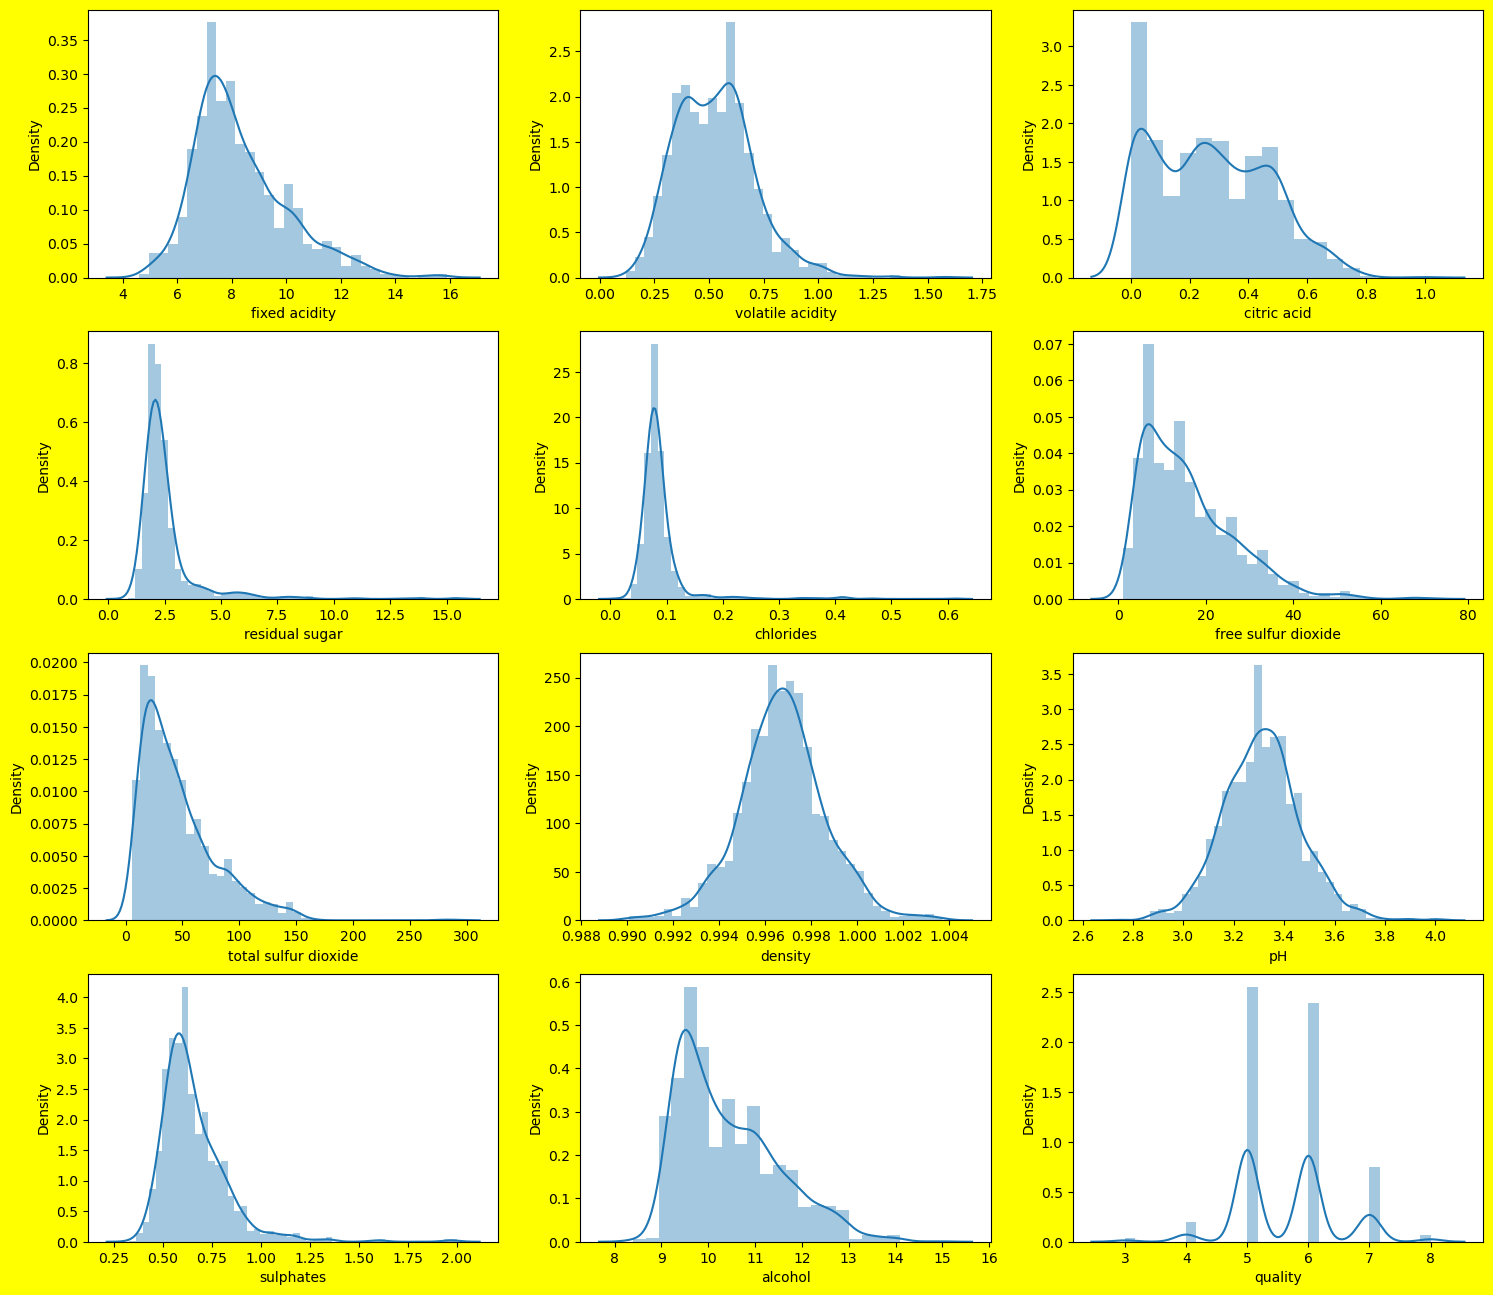

In [19]:
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='yellow')
p=1
for col in data:
    if p<=12:
        ax=plt.subplot(4,3,p)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [20]:
"""we can see there is some skewness in the data."""

'we can see there is some skewness in the data.'

In [21]:
df_feature=data.drop('quality',axis=1)

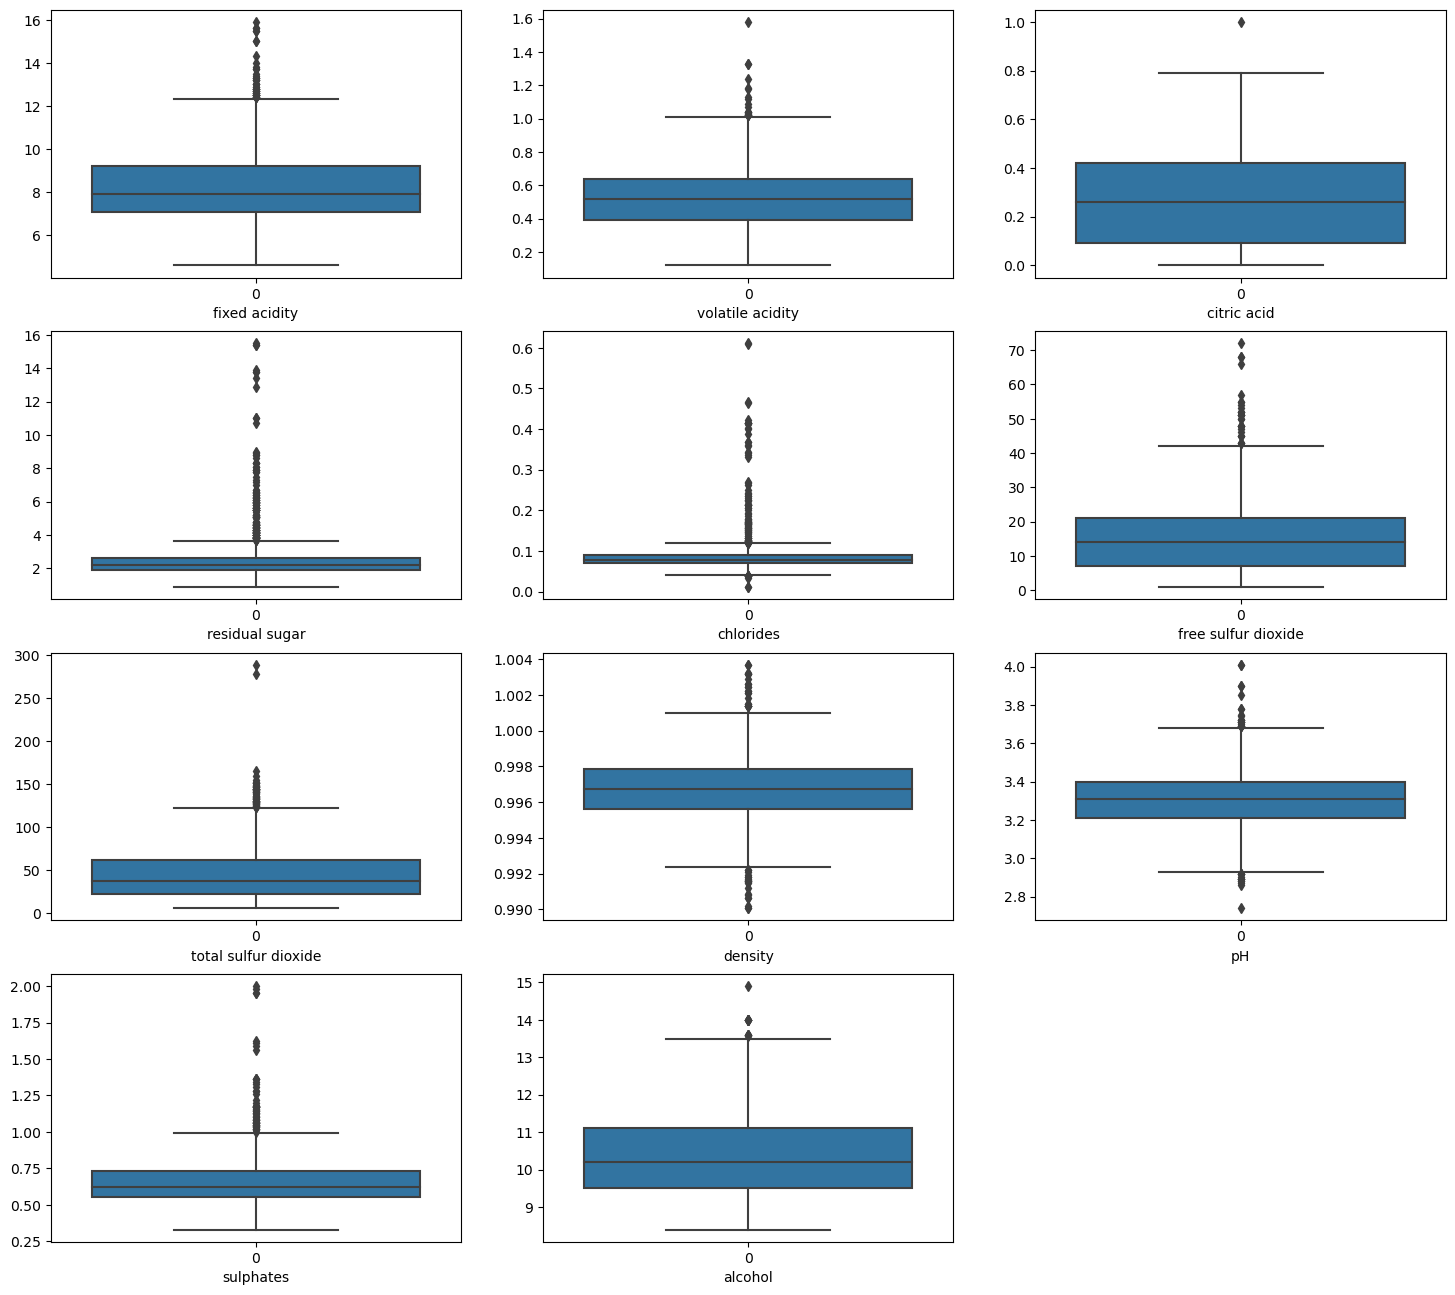

In [22]:
#visualize the outliers using boxplot
plt.figure(figsize=(18,16))
p=1
for col in df_feature:
    if p<=12:
        plt.subplot(4,3,p)
        ax=sns.boxplot(data=df_feature[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [23]:
"""here we can see outliers are present in all columns. so, using zscore removing outliers"""

'here we can see outliers are present in all columns. so, using zscore removing outliers'

In [24]:
from scipy.stats import zscore

In [25]:
z_score=zscore(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

In [26]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,5.646776
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.801119
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


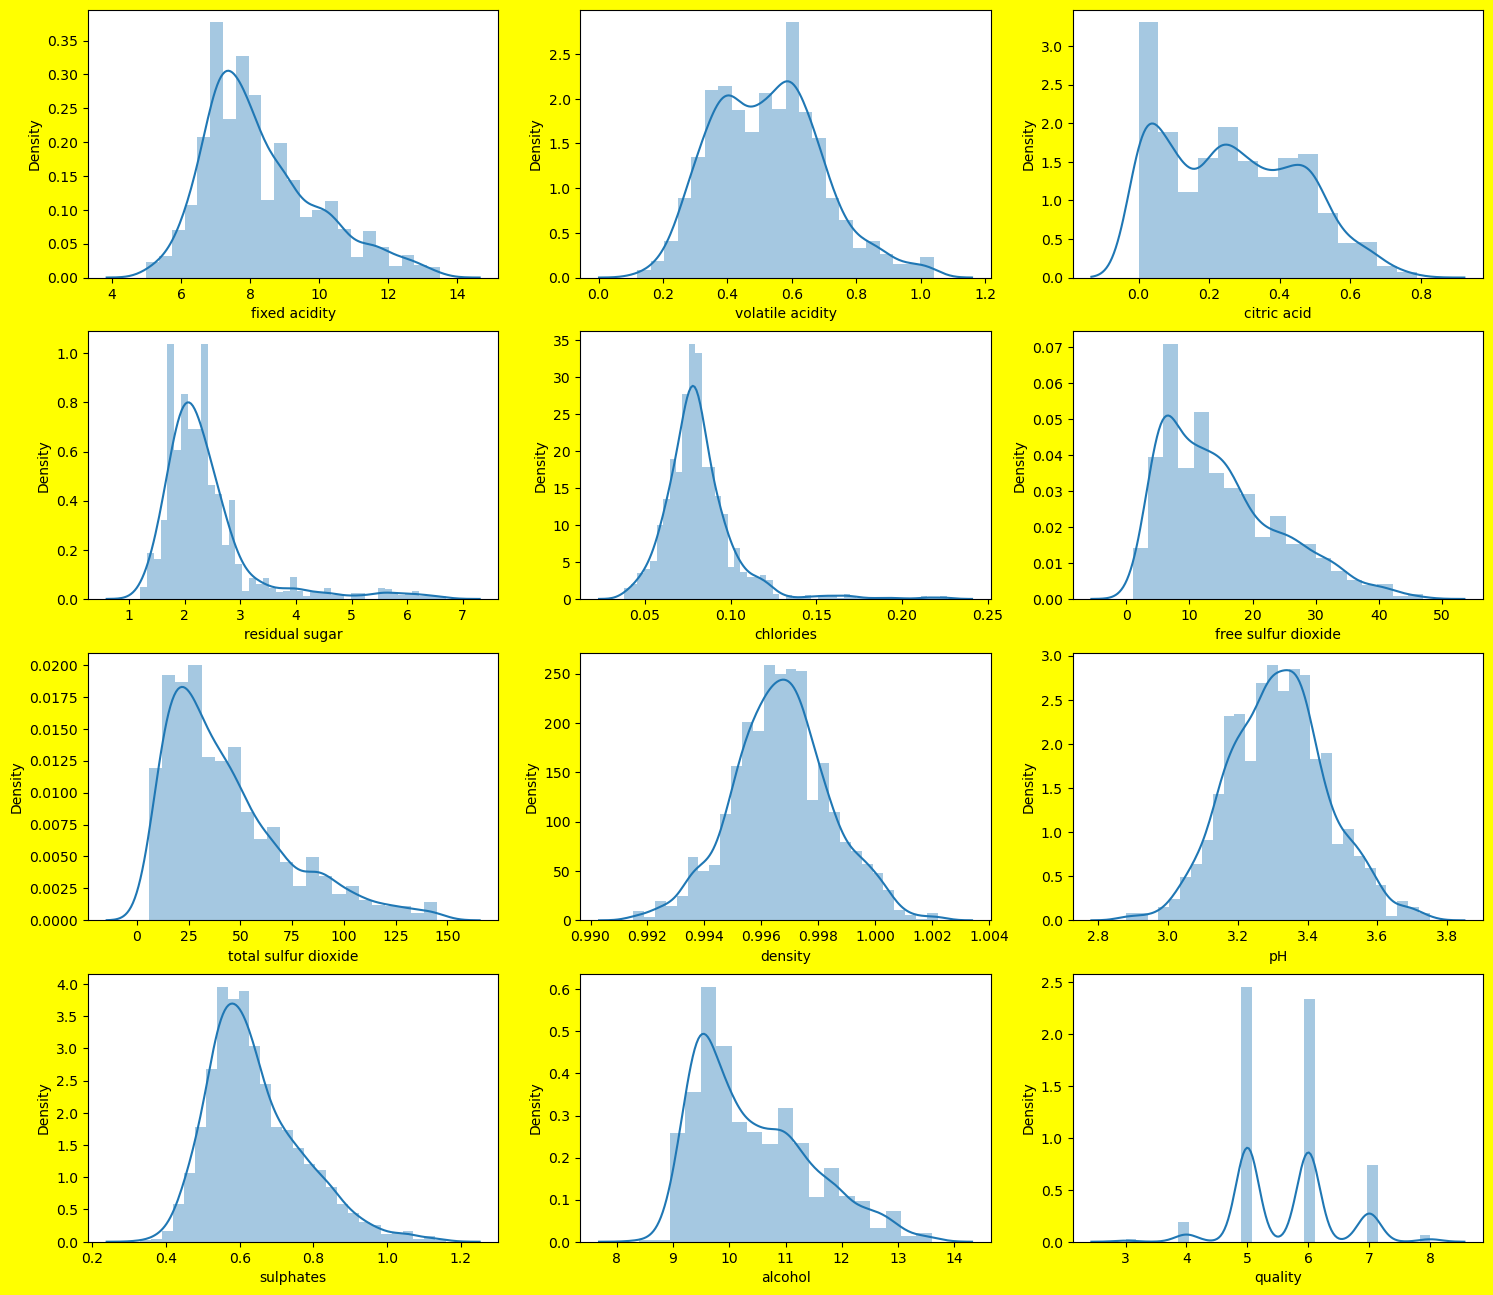

In [27]:
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='yellow')
p=1
for col in data:
    if p<=12:
        ax=plt.subplot(4,3,p)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [28]:
"""after the removing outliers data looks much better.
Now, checking the correlation between variables"""

'after the removing outliers data looks much better.\nNow, checking the correlation between variables'

In [29]:
#checking the correlation between features and target
cor=data.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.296566,0.699747,0.175809,0.187853,-0.146702,-0.098843,0.660497,-0.704507,0.200796,-0.018384,0.135851
volatile acidity,-0.296566,1.000000,-0.589286,0.032331,0.070307,0.008824,0.104585,-0.000446,0.252900,-0.350547,-0.212767,-0.362783
citric acid,0.699747,-0.589286,1.000000,0.178784,0.104950,-0.072097,0.007320,0.372338,-0.521270,0.303401,0.164420,0.238244
residual sugar,0.175809,0.032331,0.178784,1.000000,0.121287,-0.005795,0.091381,0.343236,-0.072787,0.071218,0.162423,0.053999
chlorides,0.187853,0.070307,0.104950,0.121287,1.000000,-0.057342,0.040874,0.330104,-0.183105,0.025329,-0.209711,-0.120832
free sulfur dioxide,-0.146702,0.008824,-0.072097,-0.005795,-0.057342,1.000000,0.660348,-0.039334,0.107444,0.059713,-0.076400,-0.063786
total sulfur dioxide,-0.098843,0.104585,0.007320,0.091381,0.040874,0.660348,1.000000,0.116386,-0.007726,-0.037164,-0.257834,-0.222634
density,0.660497,-0.000446,0.372338,0.343236,0.330104,-0.039334,0.116386,1.000000,-0.311217,0.127562,-0.469611,-0.177758
pH,-0.704507,0.252900,-0.521270,-0.072787,-0.183105,0.107444,-0.007726,-0.311217,1.000000,-0.039558,0.136659,-0.084922
sulphates,0.200796,-0.350547,0.303401,0.071218,0.025329,0.059713,-0.037164,0.127562,-0.039558,1.000000,0.240684,0.379814


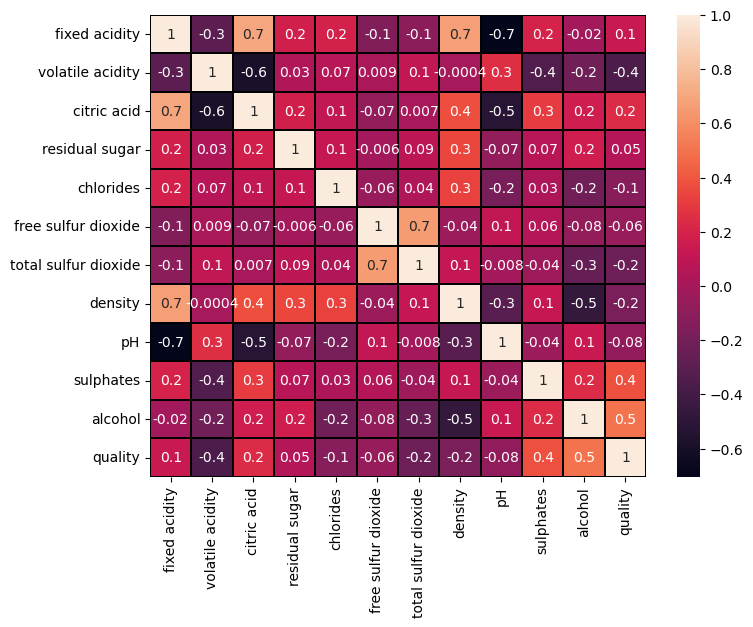

In [30]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [31]:
"""Here we can say alcohol is positively correlated with the target variable,
density and citric acid highly correlated with fixed acidity,
pH is negatively correlated with fixed acidity,citric acid, chlorides, density and quality also.
 """

'Here we can say alcohol is positively correlated with the target variable,\ndensity and citric acid highly correlated with fixed acidity,\npH is negatively correlated with fixed acidity,citric acid, chlorides, density and quality also.\n '

In [32]:
cor['quality'].sort_values(ascending = False)
#"""We can observe the positive and negative correlated features with the target"""

quality                 1.000000
alcohol                 0.497554
sulphates               0.379814
citric acid             0.238244
fixed acidity           0.135851
residual sugar          0.053999
free sulfur dioxide    -0.063786
pH                     -0.084922
chlorides              -0.120832
density                -0.177758
total sulfur dioxide   -0.222634
volatile acidity       -0.362783
Name: quality, dtype: float64

In [34]:
#Now, checking for skewness
data.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

In [35]:
"""From the above observations the skewness present in fixed acididy,residual suagar,chlorides,free sulfur dioxide,total sulfur 
dioxide,sulphates and alcohol columns. here quality is our target variable so no need to remove skewness. for other columns
removing skewness by cube root method"""

'From the above observations the skewness present in fixed acididy,residual suagar,chlorides,free sulfur dioxide,total sulfur \ndioxide,sulphates and alcohol columns. here quality is our target variable so no need to remove skewness. for other columns\nremoving skewness by cube root method'

In [37]:
data['fixed acidity']=np.cbrt(data['fixed acidity'])
data['residual sugar']=np.cbrt(data['residual sugar'])
data['free sulfur dioxide']=np.cbrt(data['free sulfur dioxide'])
data['total sulfur dioxide']=np.cbrt(data['total sulfur dioxide'])
data['sulphates']=np.cbrt(data['sulphates'])
data['alcohol']=np.cbrt(data['alcohol'])
data['chlorides']=np.cbrt(data['chlorides'])

In [38]:
#again checking skewness
data.skew()

fixed acidity           0.527560
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.127793
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.526494
alcohol                 0.643830
quality                 0.248823
dtype: float64

In [39]:
#feature scaling
data['quality']=data['quality'].apply(lambda x:1 if x>=7 else 0)

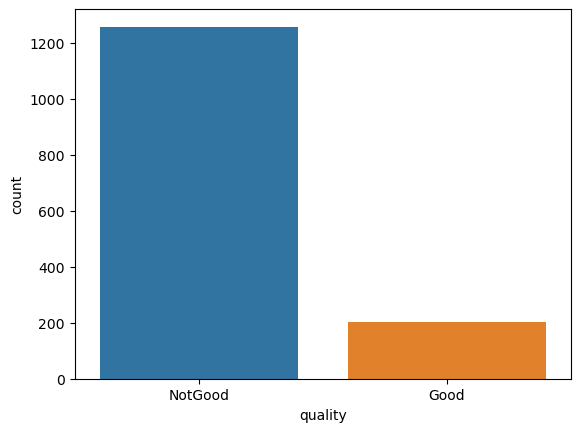

In [40]:
#checking the count of quality
sns.countplot(data=data,x='quality')
plt.xticks([0,1],['NotGood','Good'])
plt.show()

In [49]:
"""From the above graph we can see data is imbalanced.
using SMOTE we can do resampling for balancing data 
for that first do feature scaling"""

'From the above graph we can see data is imbalanced.\nusing SMOTE we can do resampling for balancing data \nfor that first do feature scaling'

In [43]:
#separating features and label
x=data.drop("quality",axis=1)
y=data["quality"]

In [44]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.529589,1.038708,-1.387413,-0.610269,-0.212751,-0.276875,-0.151874,0.629873,1.374768,-0.621424,-1.019282
1,-0.263403,2.101325,-1.387413,0.388180,0.883719,1.096574,0.934243,0.047678,-0.823752,0.359794,-0.597376
2,-0.263403,1.392914,-1.178214,-0.014565,0.602501,0.198376,0.561889,0.164117,-0.398232,0.126070,-0.597376
3,1.697926,-1.440732,1.541370,-0.610269,-0.267369,0.404518,0.740417,0.746312,-1.107432,-0.448750,-0.597376
4,-0.529589,1.038708,-1.387413,-0.610269,-0.212751,-0.276875,-0.151874,0.629873,1.374768,-0.621424,-1.019282
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.390745,0.448365,-0.969015,-0.454045,0.506051,1.588604,0.232309,-1.058494,0.949248,-0.448750,0.114140
1454,-1.623168,0.153194,-0.864416,-0.156569,-1.026243,2.013192,0.467628,-0.930411,1.445688,0.951183,0.794696
1455,-1.314940,-0.082944,-0.707517,-0.014565,-0.212751,1.387532,0.086430,-0.569449,0.736488,0.879603,0.603216
1456,-1.623168,0.714019,-0.759816,-0.454045,-0.267369,1.588604,0.232309,-0.726642,1.800288,0.586742,-0.186800


In [45]:
"'we have scaled the data using standard scalarization method to overcome the issue of biasness"''

"'we have scaled the data using standard scalarization method to overcome the issue of biasness"

In [46]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,8.157395,fixed acidity
1,1.856287,volatile acidity
2,3.132771,citric acid
3,1.756746,residual sugar
4,1.213013,chlorides
5,2.577338,free sulfur dioxide
6,2.866166,total sulfur dioxide
7,6.765176,density
8,3.360299,pH
9,1.341956,sulphates


In [47]:
y.value_counts()

quality
0    1257
1     201
Name: count, dtype: int64

In [48]:
"'Here we can see that the data is not balanced,we will balance the data using oversampling method"''

"'Here we can see that the data is not balanced,we will balance the data using oversampling method"

In [50]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [51]:
#checking value count of target col
y.value_counts()

quality
0    1257
1     201
Name: count, dtype: int64

In [52]:
#after SMOTE() checking value count of target col
y1.value_counts()

quality
0    1257
1    1257
Name: count, dtype: int64

In [53]:
#.........MODELLING........
#Finding best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ",maxAccu,"on Random state",maxRs)

Best Accuracy is  0.9406392694063926 on Random state 26


In [54]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRs)

In [55]:
#....CLASSIFICATION ALGORITHMS.....
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve
from sklearn.model_selection import cross_val_score

In [56]:
#........Random forest classifier.....
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)

print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.9430463576158941
[[346  31]
 [ 12 366]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       377
           1       0.92      0.97      0.94       378

    accuracy                           0.94       755
   macro avg       0.94      0.94      0.94       755
weighted avg       0.94      0.94      0.94       755



In [57]:
#.........LOGISTIC REGRESSION.......
#checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)

print(accuracy_score(y_test,pred_LR))
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.8251655629139073
[[306  71]
 [ 61 317]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       377
           1       0.82      0.84      0.83       378

    accuracy                           0.83       755
   macro avg       0.83      0.83      0.83       755
weighted avg       0.83      0.83      0.83       755



In [58]:
#.........SUPPORT VECTOR MACHINE CLASSIFIER.......
#checking accuracy for support vector machine classifier
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8980132450331125
[[331  46]
 [ 31 347]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       377
           1       0.88      0.92      0.90       378

    accuracy                           0.90       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.90      0.90      0.90       755



In [59]:
#.........GRADIENT BOOSTING CLASSIFIER.......
#checking accuracy for gradient boosting classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)

print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8940397350993378
[[322  55]
 [ 25 353]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       377
           1       0.87      0.93      0.90       378

    accuracy                           0.89       755
   macro avg       0.90      0.89      0.89       755
weighted avg       0.90      0.89      0.89       755



In [60]:
#.........Ada BOOST CLASSIFIER.......
#checking accuracy for AdaBoostclassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

0.8543046357615894
[[314  63]
 [ 47 331]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       377
           1       0.84      0.88      0.86       378

    accuracy                           0.85       755
   macro avg       0.85      0.85      0.85       755
weighted avg       0.85      0.85      0.85       755



In [61]:
#.........BAGGINGCLASSIFIER.......
#checking accuracy for Baggingclassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)

print(accuracy_score(y_test,pred_BC))
print(confusion_matrix(y_test,pred_BC))
print(classification_report(y_test,pred_BC))

0.9112582781456954
[[338  39]
 [ 28 350]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       377
           1       0.90      0.93      0.91       378

    accuracy                           0.91       755
   macro avg       0.91      0.91      0.91       755
weighted avg       0.91      0.91      0.91       755



In [62]:
#.........ExtraTREESCLASSIFIER.......
#checking accuracy for ExtraTreesclassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))

0.952317880794702
[[352  25]
 [ 11 367]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       377
           1       0.94      0.97      0.95       378

    accuracy                           0.95       755
   macro avg       0.95      0.95      0.95       755
weighted avg       0.95      0.95      0.95       755



In [63]:
#..........CROSS VALIDATION SCORE........
from sklearn.model_selection import cross_val_score

In [64]:
#checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score:",accuracy_score(y_test,pred_RFC)-score.mean())

[0.97813121 0.89463221 0.94831014 0.86878728 0.90438247]
0.9188486610219163
Difference between Accuracy Score and Cross Validation Score: 0.024197696593977747


In [65]:
#checking cv score for Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score:",accuracy_score(y_test,pred_LR)-score.mean())

[0.88667992 0.78926441 0.84493042 0.71968191 0.80478088]
0.809067507306757
Difference between Accuracy Score and Cross Validation Score: 0.016098055607150275


In [66]:
#checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score:",accuracy_score(y_test,pred_GB)-score.mean())

[0.92246521 0.85884692 0.91252485 0.80516899 0.85856574]
0.8715143402533009
Difference between Accuracy Score and Cross Validation Score: 0.022525394846036884


In [67]:
#checking cv score for Support Vector Machine Classifier
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score:",accuracy_score(y_test,pred_svc)-score.mean())

[0.9304175  0.8250497  0.88469185 0.80715706 0.85258964]
0.8599811489627969
Difference between Accuracy Score and Cross Validation Score: 0.03803209607031566


In [68]:
#checking cv score for AdaBoostingClassifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score:",accuracy_score(y_test,pred_ABC)-score.mean())

[0.90059642 0.81510934 0.87276342 0.75944334 0.82669323]
0.8349211503885057
Difference between Accuracy Score and Cross Validation Score: 0.019383485373083764


In [69]:
#checking cv score for Bagging Classifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score:",accuracy_score(y_test,pred_BC)-score.mean())

[0.92842942 0.89463221 0.91451292 0.86282306 0.89840637]
0.8997607977632216
Difference between Accuracy Score and Cross Validation Score: 0.01149748038247378


In [70]:
#checking cv score for ExtraTreesClassifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score:",accuracy_score(y_test,pred_ET)-score.mean())

[0.99204771 0.89662028 0.9582505  0.87077535 0.92629482]
0.9287977315390524
Difference between Accuracy Score and Cross Validation Score: 0.023520149255649603


In [71]:
"""ExtraTreesClassifier is our best model as the difference between accuracy score and cross 
validation score is least

...............ExtraTreesClassifier IS OUR BEST MODEL......"""

'ExtraTreesClassifier is our best model as the difference between accuracy score and cross \nvalidation score is least\n\n...............ExtraTreesClassifier IS OUR BEST MODEL......'

In [72]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],
      'random_state':[10,50,1000],
      'max_depth':[0,10,20],
      'n_jobs':[-2,-1,1] ,
      'n_estimators':[50,100,200,300]
      }
GSCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [73]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [76]:
final_model=ExtraTreesClassifier(criterion= 'gini',max_depth= 20,n_estimators= 100,n_jobs= -2,random_state= 50)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

95.2317880794702


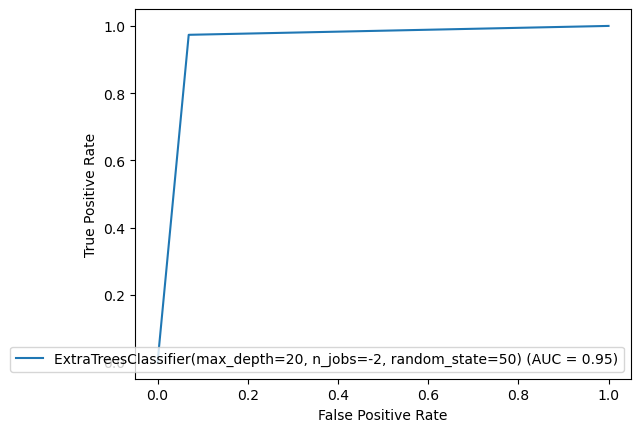

In [77]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [78]:
#saving model
import joblib
joblib.dump(final_model,"winequality.pkl")

['winequality.pkl']

In [80]:
model=joblib.load("winequality.pkl")